# Projet de l'UE Apprentissage

---
Léo GAUTHIER


In [ ]:
# Espace d'importation des modules :

# Modules basiques et de pré-traitement
from google.colab import files
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy.stats
from sklearn.preprocessing import StandardScaler

# Modules pour les calculs de score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# Modules pour la forêt aléatoire
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Modules pour le support vector machine
from sklearn import svm
from sklearn import neighbors

# Modules pour la régression logistique
from sklearn.linear_model import LogisticRegressionCV

## Chargement et préparation des données réelles  

On importe le jeu de donnée

In [ ]:
healthy_tissues = files.upload()

Saving tissue_predictor_filtered_healthy_nofluid.csv to tissue_predictor_filtered_healthy_nofluid.csv


In [ ]:
df = pd.read_csv('tissue_predictor_filtered_healthy_nofluid.csv', sep="/")
df.shape

(2351, 4273)

Il y a 2351 observations et 4273 variables, ici majoritairement des protéines.

On décrit un peu le jeu de données :

In [ ]:
df.head()

,A0A075B6H7,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6K4,A0A075B6Q5,A0A0A0MRZ7,A0A0A0MS14,A0A0A0MS15,A0A0B4J1U7,...,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y8,cell_type,tissue_name,disease_status,fluid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0


In [ ]:
df.describe()

,A0A075B6H7,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6K4,A0A075B6Q5,A0A0A0MRZ7,A0A0A0MS14,A0A0A0MS15,A0A0B4J1U7,...,Q9Y6R1,Q9Y6U3,Q9Y6V0,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y8,fluid
count,2351.000000,2.351000e+03,2351.000000,2.351000e+03,2.351000e+03,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2.351000e+03,2351.000000,2351.0
mean,0.000001,6.697186e-07,0.000014,9.826989e-07,1.901289e-07,0.000007,0.000006,0.000007,0.000058,0.000012,...,0.000059,0.000078,0.000002,0.000001,0.000047,0.000005,0.000002,6.572641e-07,0.000070,0.0
std,0.000036,1.763698e-05,0.000152,2.759327e-05,9.218799e-06,0.000086,0.000072,0.000087,0.000812,0.000124,...,0.000389,0.000374,0.000016,0.000011,0.000232,0.000034,0.000023,1.026350e-05,0.000242,0.0
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
25%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
50%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
75%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
max,0.001436,5.371046e-04,0.002970,9.322663e-04,4.469929e-04,0.001869,0.001154,0.002365,0.028215,0.002288,...,0.006642,0.006302,0.000273,0.000224,0.004780,0.000564,0.000426,2.906755e-04,0.003582,0.0


Combien de classes sont présentes dans ce jeu de données ?

In [ ]:
print(np.unique(df['tissue_name']).size)

53


On regarde la répartition des classes :

In [ ]:
df['tissue_name'].value_counts().head()

,count
tissue_name,
Liver,202
Testis,171
Eye,127
Kidney,121
Pancreas,104


In [ ]:
df['tissue_name'] .value_counts().tail()

,count
tissue_name,
Epidymis,2
Parathyroid gland,2
Seminal vesicle,2
Uterus,2
Trachea,2


Il y a l'air d'y avoir beaucoup de classes peu représentées. On le vérifie :

In [ ]:
(df['tissue_name'].value_counts() < 3).sum()

np.int64(8)

Il faudra faire attention à ces classes peu représentées. Dans l'article, les chercheurs mentionnent avoir supprimé les classes avec moins de 3 observation :

> First, any classes insufficiently
represented in the data set were removed. For this, a minimum
of three assays was required for each tissue sample

(page 1184, paragraphe *Training and Comparing Predictive Algorithms*)

On fait pareil pour justement améliorer la robustesse des modèles, car les classes peu représentées dans un jeu de données aussi déséquilibré seront très mal apprises :

In [ ]:
compte = df['tissue_name'].value_counts()
classes_conservees = compte[compte > 3].index
df = df[df['tissue_name'].isin(classes_conservees)]

In [ ]:
print(np.unique(df['tissue_name']).size)

45


In [ ]:
df.shape

(2335, 4273)

On a retiré 16 observations, ce qui est cohérent avec les 8 classes ayant 2 d'observations.

On vérifie maintenant le format des variables pour savoir si des conversions sont à faire. Puisqu'il y a environ 2500 variables, on préfère vérifier lesquelles ne sont pas au format numérique.
On réflechit dans ce sens car théoriquement la majeure partie des variables doivent être en format numérique, à l'exception des quelques variables à la fin.

In [ ]:
print(df.select_dtypes(exclude=['int64', 'float64']))

     cell_type tissue_name disease_status
0        Brain       Brain        Healthy
1        Brain       Brain        Healthy
2        Brain       Brain        Healthy
3        Brain       Brain        Healthy
4        Brain       Brain        Healthy
...        ...         ...            ...
2346   Stomach     Stomach        Healthy
2347   Stomach     Stomach        Healthy
2348   Stomach     Stomach        Healthy
2349   Stomach     Stomach        Healthy
2350   Stomach     Stomach        Healthy

[2335 rows x 3 columns]


Parfait. On vérifie désormais si il y a des valeurs manquantes :

In [ ]:
df.isna().any().any()

np.False_

On propose ensuite un premier graphique représentant la distribution des classes :

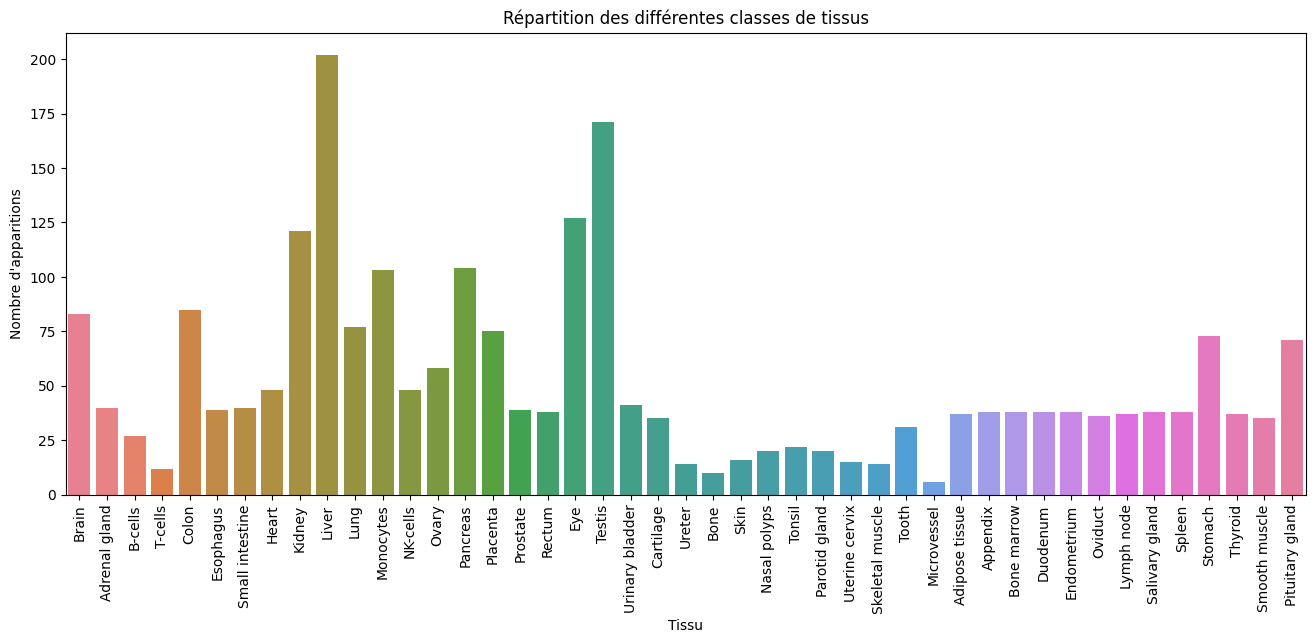

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(df, x="tissue_name", hue = "tissue_name")
plt.xticks(rotation=90)
plt.title('Répartition des différentes classes de tissus')
plt.xlabel('Tissu')
plt.ylabel('Nombre d\'apparitions')
plt.show()

## Prédiction toutes classes confondues

### 2) Forêt aléatoire

On commence par définir les échantillons des variables cibles et explicatives.

In [ ]:
X = df.drop(columns = ['cell_type', 'tissue_name', 'disease_status', 'fluid'], axis=1)
y = df['tissue_name']

Lors de ma première RFC, j'ai rencontré un problème important lié au déséquilibre des classes : certaines classes n'étaient pas présentes dans le vecteur de test. Je m'en suis rendu compte lors de l'affichage de ma première matrice de confusion. Cette absence est un souci, car elle n'apporte pas d'information exclusive : c'est du au découpage aléatoire et au gros déséquilibrage des classes du jeu de données.

À l'inverse, l'absence de certaines classes dans le vecteur de prédiction signifie que le modèle a du mal à la distinguer. Il ne l'a jamais considéré comme la meilleure option (elle peut être très proche d'une autre classe par exemple).


C'est devant ce problème que j'ai pris la décision de retirer les classes trop peu représentées, sur la base de la règle de décision de l'article.

De plus, il fallait faire en sorte que toutes les classes soient représentées de façon similaire dans le vecteur d'entraînement et de test.

Pour pouvoir l'assurer, j'utilise l'argument `stratify` lors du découpage aléatoire, qui s'assurera que les classes aient une proportion similaire dans le découpage qu'elles ont dans le jeu de données initial ([source](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn), lien vers un topic stackoverflow).

On procède alors au découpage entraînement/test. Je considère une taille d'échantillon de test de 20%.

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [ ]:
#On vérifie que toutes les classes possibles (45) sont présentes dans le test
print(np.unique(y_test).size)

45


On peut désormais utiliser la forêt aléatoire.

In [ ]:
 modele_rfc = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
 modele_rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Dans RandomForestClassifier, il existe un argument `class_weight`, et si on lui précise `'balanced'`, il va associer un poids inversement proportionnelle à la représentation de chaque classe ([source]((https://www.geeksforgeeks.org/how-does-the-classweight-parameter-in-scikit-learn-work/)), lien vers un topic du site geeksforgeeks.org). Il est important de l'utiliser ici, car le jeu de données est très déséquilibré. Si on ne le fait pas, les performances du modèle seront biaisées par les classes majoritaires.

On peut désormais faire la prédiction sur le jeu de test

In [ ]:
y_pred = modele_rfc.predict(X_test)

Pour pouvoir évaluer la qualité de la prédiction, on va devoir considérer une mesure. Pour choisir, on prend justement en compte le fait que la répartition des classes est très déséquilibrée. Dans ce cas, la mesure qui me semble appropriée est le score f1, qui combine précision (peu de faux positifs) et rappel (peu de faux négatifs). Un bon score f1 signifie que le modèle fait de bonne prédictions de la classe en suffisamment bon nombre.

Il existe différentes façons de calculer le f1, en variant les poids donnés aux classes

In [ ]:
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1-macro:", f1_macro)

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1-weighted:", f1_weighted)

F1-macro: 0.997017797017797
F1-weighted: 0.9935834329838612


Le `f1-macro` va simplement être la moyenne du score f1 par classes, tandis que le `f1-weighted` va accorder à chaque classe un poids proportionnel à sa présence. Les classes les plus présentes seront donc mises en avant.

La différence entre les deux scores est minime, mais étonnante. Le `f1-weighted` est moins élevé que le `f1-macro`, ce qui signifie que le modèle performe très bien sur les classes minoritaires, et un peu moins bien sur certaines classes majoritaires.

Pour en savoir plus, on peut regarder le rapport de classification :

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

 Adipose tissue       1.00      1.00      1.00         7
  Adrenal gland       1.00      1.00      1.00         8
       Appendix       1.00      1.00      1.00         8
        B-cells       1.00      1.00      1.00         5
           Bone       1.00      1.00      1.00         2
    Bone marrow       1.00      1.00      1.00         8
          Brain       1.00      1.00      1.00        17
      Cartilage       0.88      1.00      0.93         7
          Colon       1.00      1.00      1.00        17
       Duodenum       1.00      1.00      1.00         8
    Endometrium       1.00      1.00      1.00         8
      Esophagus       1.00      1.00      1.00         8
            Eye       1.00      1.00      1.00        25
          Heart       1.00      1.00      1.00        10
         Kidney       1.00      1.00      1.00        24
          Liver       1.00      0.93      0.96        40
           Lung       1.00    

Il confirme les très bonnes performances du modèle, à l'exception de :


*   Cartilage (f1 = 0.93)
*   Liver (f1 = 0.96)
*   Testis (f1 = 0.97)

On vérifie également si toutes les classes ont été prédites :

In [ ]:
np.unique(y_pred).size

45

On propose maintenant la matrice de confusion normalisée :



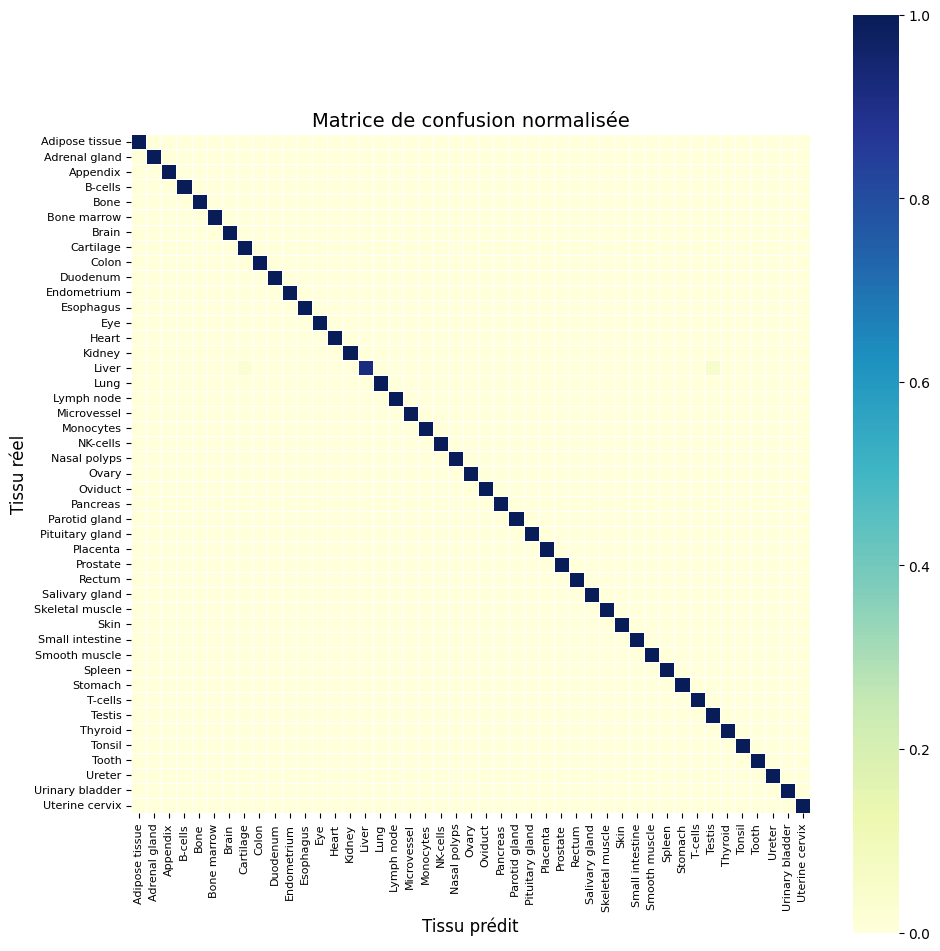

In [ ]:
matrice_confusion_normalize = confusion_matrix(y_test, y_pred, normalize = 'true')

labels = sorted(y.unique()) #J'affiche les labels dans l'ordre alphabétique pour que ce soit plus lisible

plt.figure(figsize=(10, 10))
sns.heatmap(matrice_confusion_normalize,
            cmap="YlGnBu",
            cbar=True,
            square=True,
            linewidths=0.5,
            xticklabels = labels,
            yticklabels = labels)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.xlabel("Tissu prédit", fontsize=12)
plt.ylabel("Tissu réel", fontsize=12)
plt.title("Matrice de confusion normalisée", fontsize=14)
plt.tight_layout()
plt.show()

On peut également afficher la matrice de confusion brute, avec les comptes pour avoir un diagnostique graphique un peu plus précis :

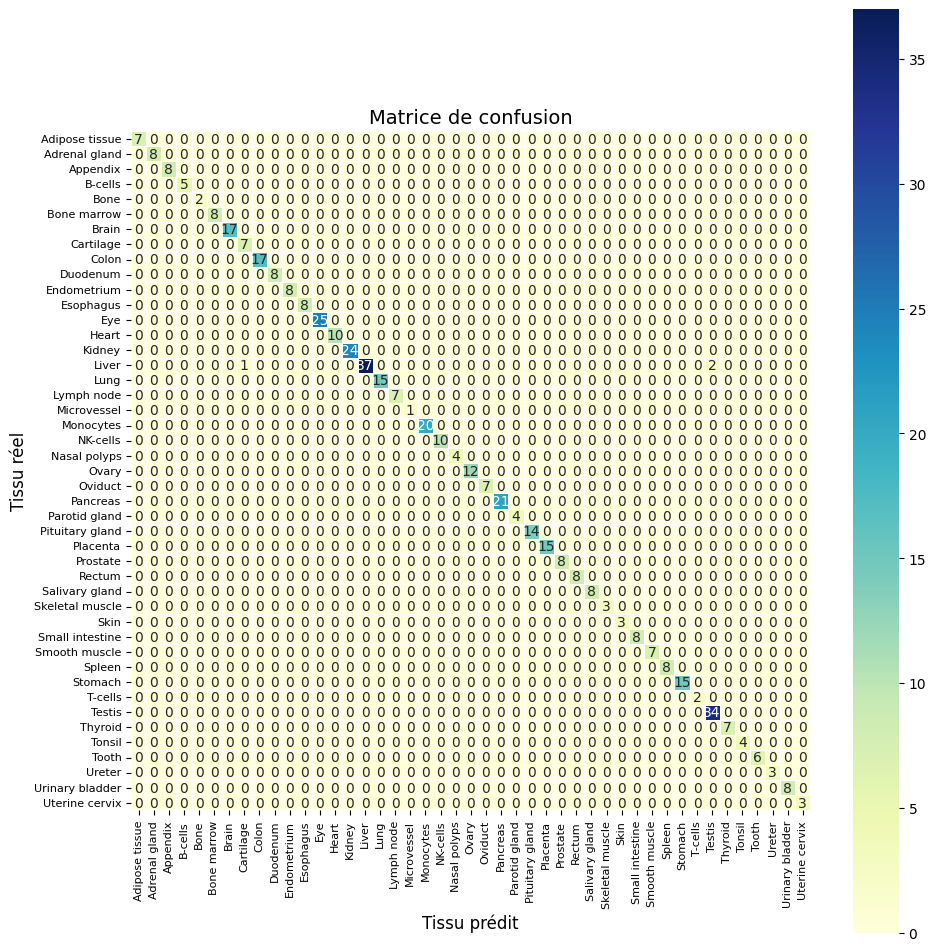

In [ ]:
matrice_confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrice_confusion,
            annot=True, # Pour lire le nombre de prédictions sur la matrice
            cmap="YlGnBu",
            cbar=True,
            square=True,
            linewidths=0.5,
            xticklabels = labels,
            yticklabels = labels)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.xlabel("Tissu prédit", fontsize=12)
plt.ylabel("Tissu réel", fontsize=12)
plt.title("Matrice de confusion", fontsize=14)
plt.tight_layout()
plt.show()

La forêt aléatoire donne donc d'excellents résultats, même sur les classes rares.  

## Prédiction pour un tissu particulier

### 3) Deux méthodes de classifications binaires

On doit choisir un tissu particulier pour réaliser une prédiction. Il doit avoir suffisamment d'observations. Naturellement, on va considérer le foie car c'est le tissu avec le plus d'observations. On doit créer un nouveau jeu de données, qui contient une nouvelle variable binaire qui prend 1 si le tissu de l'observation est le foie et 0 sinon.

In [ ]:
df_cible = df.copy()
df_cible['cible'] = (df_cible['tissue_name'] == 'Liver').astype(int)
df_cible.head(5)

,A0A075B6H7,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6K4,A0A075B6Q5,A0A0A0MRZ7,A0A0A0MS14,A0A0A0MS15,A0A0B4J1U7,...,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y8,cell_type,tissue_name,disease_status,fluid,cible
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Brain,Brain,Healthy,0,0


On doit désormais choisir deux méthodes de classifications binaires autre qu'une forêt aléatoire. Dans l'article, les chercheurs considèrent entre autre un Support Vector Machine, une régression logistique. Ils ont également considérer l'algorithme t-SNE de réduction de dimension, ce qui n'est évidemment pas approprié ici.

On connait de nombreux algorithmes de classifications et prédiction, mais tous ne sont pas appropriés à cette situation. Par exemple, les k-plus proches voisins pourraient sembler pertinent à première vue, mais on sait que cette méthode est sensible au fléau de la dimension : plus le nombre de variables explicatives est élevé, plus il est compliqué de mesurer correctement une distance entre deux observations sur un hyperplan. On considère un modèle avec 4200 variables explicatives : ce n'est pertinent.

En toute logique, on va nous aussi considérer un SVM et une régression logistique.

On prépare les échantillons d'entraînement et de test :

In [ ]:
X = df_cible.drop(columns = ['cell_type', 'tissue_name', 'disease_status', 'fluid', 'cible'], axis=1)
y = df_cible['cible']

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

#### Filtrage sur la base des variances et covariances avec la variable cible

Avant de commencer avec les modèles de classification, on fait d'abord un tri préalable des variables explicatives sur la base de :

*   leurs variances : si elle est trop faible, la variable est peu explicative
*   leurs covariances avec la variable cible : si elle est trop faible, la variable ne jouera pas de rôle dans la prédiction

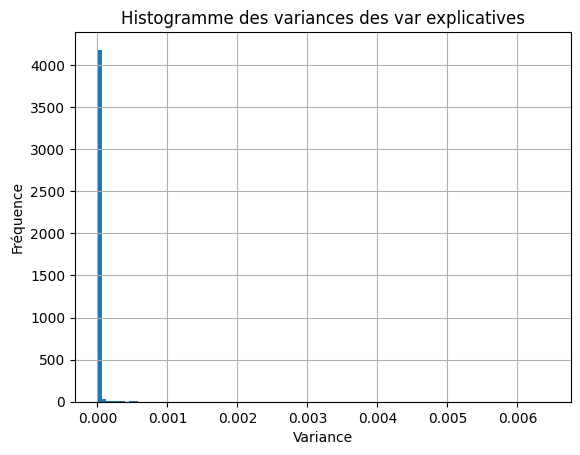

In [ ]:
varlist = X.var()
varlist.hist(bins=100)
plt.title('Histogramme des variances des var explicatives')
plt.xlabel('Variance')
plt.ylabel('Fréquence')
plt.show()

Il semble y avoir énormement de variables dont la variance est infime, ce qui est normal vu les ordres de grandeurs du jeu de données ($10^{-3}$ ou $10^{-4}$ par exemple). On le vérifie avec :

In [ ]:
(varlist > 1e-6).sum()

np.int64(635)

Seulement 15% des variables ont une variance supérieure à 0,000001. On regarde maintenant les corrélations de Spearman entre les variables et la variable cible :

<ipython-input-253-1a5369bca995>:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corlist[i] = abs(scipy.stats.spearmanr(y_train, X_train_numpy[:,i]).correlation)


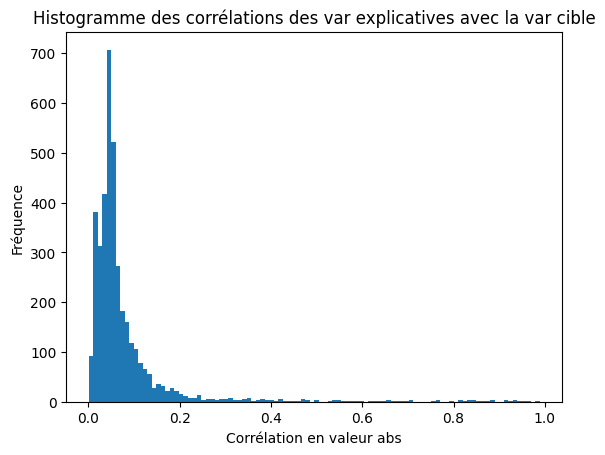

In [ ]:
X_train_numpy = X_train.to_numpy()

corlist = np.zeros(X_train.shape[1])
for i in range(X_train.shape[1]):
  corlist[i] = abs(scipy.stats.spearmanr(y_train, X_train_numpy[:,i]).correlation)

plt.hist(corlist, bins=100)
plt.title('Histogramme des corrélations des var explicatives avec la var cible')
plt.xlabel('Corrélation en valeur abs')
plt.ylabel('Fréquence')
plt.show()

On fixe un seuil au dessus du quel on va considérer les variables comme "significatives". On peut fixer, par exemple, 1e-6 pour les variances et 0,2 pour les corrélations :

In [ ]:
tokeep = []
for i in range(X_train.shape[1]):
    if varlist[i]>1e-6 and corlist[i]>0.20:
        tokeep.append(X_train.columns[i])

<ipython-input-254-ab1f3a2fbe0c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if varlist[i]>1e-6 and corlist[i]>0.20:


In [ ]:
print("Après le tri, on garde", len(tokeep), "variables")

Après le tri, on garde 141 variables


On réduit maintenant les jeu de données :

In [ ]:
X_train_mod = X_train[tokeep]
X_test_mod = X_test[tokeep]

Maintenant que cela est fait, il faut centrer-réduire les données. En effet, ces 2 modèles nécéssitent d'avoir des données centrés-réduites, car ils dépendent de la distance (pour le SVM), ou d'un problème d'optimisation sensible aux différences d'échelle (pour la régression logistique).

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train_mod)
X_test = scaler.transform(X_test_mod)

#### Support Vector Machine

Après ce tri préalable, on peut faire appel au SVM. On va pour l'instant considérer qu'il existe une séparation linéaire entre les classes, donc on indique `kernel = 'linear'`.

In [ ]:
modele_svm = svm.SVC(random_state = 42, kernel = 'linear', class_weight='balanced')

In [ ]:
modele_svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

On prédit :

In [ ]:
y_pred = modele_svm.predict(X_test)

On doit désormais choisir une mesure pour ces modèles. On utilise le score f1 comme à la question 2 même si d'autres mesures peuvent être adaptées (les aires sous la courbe telles que ROC-AUC ou PR-AUC) mais sont plus difficles à interpréter. Regardons le rapport de classification :

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       0.97      0.97      0.97        40

    accuracy                           1.00       467
   macro avg       0.99      0.99      0.99       467
weighted avg       1.00      1.00      1.00       467



Les prédictions sont très très bonnes aussi bien pour les classes positives et négatives. On peut regarder le score f1, qui possède un argument 'binary' qui est adapté justement pour les cas de classifications binaires, juste pour représenter la répartition Liver/non Liver.

In [ ]:
f1_svm = f1_score(y_test, y_pred, average='binary')
print("Le score f1 est :", f1_svm)

Le score f1 est : 0.975


Pour la matrice de confusion :

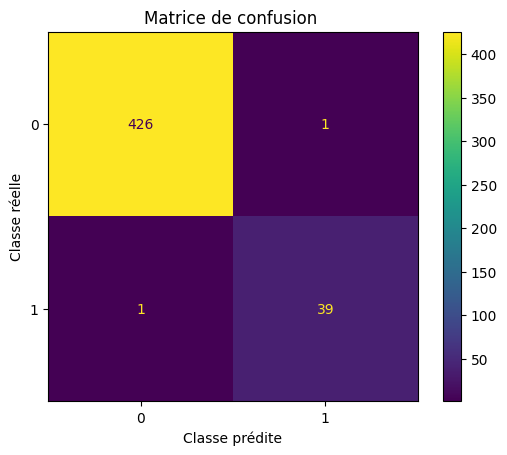

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Matrice de confusion ")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()

La première question est de savoir si il y a de meilleurs hyperparamètres pour le SVM, qui pourrait permettre d'éliminer les deux false negative and false positive. On peut les tuner avec un `GridSearchCV`. On optimise les paramètres C, qui est un paramètre de régularisation et Gamma qui intervient dans les noyaux non linéaires.

La deuxième question, de paire avec la première, est de savoir si on peut avoir une meilleure prédiction en considérant une séparation autre que linéaire. On vérifie avec le noyau gaussien `rbf`:

In [ ]:
gs = sklearn.model_selection.GridSearchCV(estimator=svm.SVC(),
             param_grid={'C': [0.005, 0.01, 0.1], 'gamma': [8, 7, 6],'kernel': ('linear', 'rbf'), 'class_weight':['balanced']}, scoring = 'f1') #Il doit optimiser la bonne mesure

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.005, 0.01, 0.1], 'class_weight': ['balanced'],
                         'gamma': [8, 7, 6], 'kernel': ('linear', 'rbf')},
             scoring='f1')

On affiche les meilleurs hyperparamètres :

In [ ]:
gs.best_params_

{'C': 0.005, 'class_weight': 'balanced', 'gamma': 8, 'kernel': 'linear'}

Maintenant qu'on a les paramètres tunés, on peut faire la prédiction

In [ ]:
grid_pred = gs.predict(X_test)

On affiche également la matrice de confusion

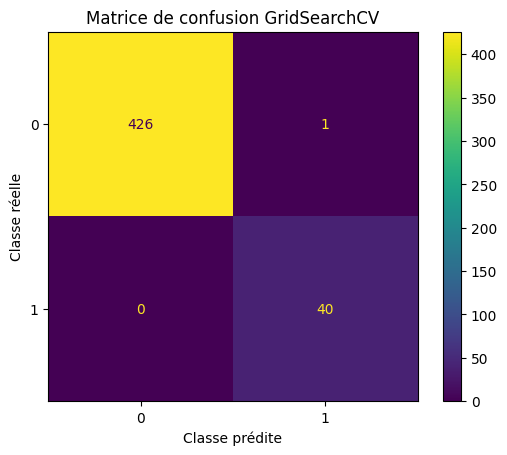

In [ ]:
cm_gs = confusion_matrix(y_test,grid_pred)
ConfusionMatrixDisplay(cm_gs).plot()
plt.title("Matrice de confusion GridSearchCV")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()

On affiche le `f1` du SVM avec les hyperparamètres tunés :

In [ ]:
f1_gs = f1_score(y_test, grid_pred, average='binary')
print("Le score f1 est :", f1_gs)

Le score f1 est : 0.9876543209876543


On affiche également le rapport de classification, car on a de très bons résultats :

In [ ]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       0.98      1.00      0.99        40

    accuracy                           1.00       467
   macro avg       0.99      1.00      0.99       467
weighted avg       1.00      1.00      1.00       467



Globalement, les deux modèles SVM sont très bons. On a réussi à l'optimiser avec un GridSearchCV.

#### Régression logistique

On réalise maintenant la régression logistique. On doit absolument considérer une pénalité pour éviter ici aussi le surapprentissage.

Quelle pénalité doit-on choisir ? On sait que la pénalité Ridge a un inconvénient : elle ne fait pas de sélection de variables, donc son interprétation est compliquée, particulièrement en grande dimension. La pénalité Lasso va avoir, elle, tendance à favoriser une variable en cas de multicolinéarité.

On peut donc utiliser une pénalité Lasso, car l'écueil risqué avec une pénalité Ridge peut rendre les choses trop compliquées.

On va maintenant faire une validation croisée pour choisir un paramètre $\mathcal{C} = \frac{1}{\lambda}$ optimal, qui permettra d'éviter au maximum le risque de surapprentissage.Plus $\mathcal{C}$ sera petit, plus des variables auront un coefficient nul.

On doit également choisir un solver fiable pour avoir un algorithme qui convergera. Je choisis le solver 'saga', qui est optimisé pour les paramètres de classification en grande dimension ([source](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions), lien vers un topic stackoverflow). On peut set-up le modèle :

In [ ]:
reg_log = LogisticRegressionCV(cv=5, penalty ='l1', scoring = 'f1', solver = "saga", max_iter=5000)
reg_log.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1', scoring='f1',
                     solver='saga')

In [ ]:
print("La valeur de C est :",reg_log.C_)

La valeur de C est : [166.81005372]


On regarde combien de coefficients ont été mis à 0 :

In [ ]:
print("Le nombre de coefficients mis à 0 est :", (reg_log.coef_==0).sum())

Le nombre de coefficients mis à 0 est : 5


Cela fait peu de coefficients mis à zéro. Il faut durcir la pénalité. On va faire un arbitrage entre performance moyenne par validation croisée, et la valeur de $\mathcal{C}$. En effet, on pourra resserrer l'intervalle de $\mathcal{C}$ qu'on considérera, tout en conservant une bonne performance.

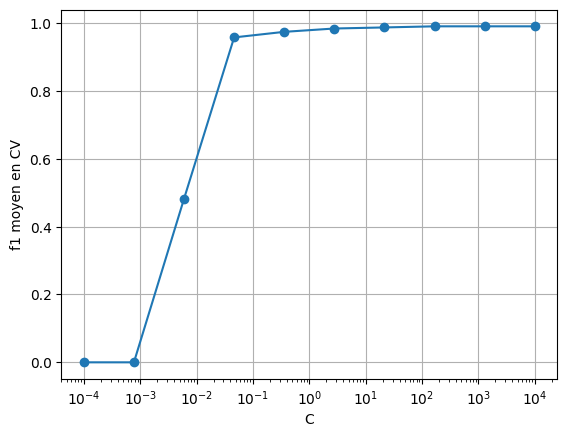

In [ ]:
mean_scores = reg_log.scores_[1].mean(axis=0)
plt.plot(reg_log.Cs_, mean_scores, marker='o')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("f1 moyen en CV")
plt.grid(True)
plt.show()

Ici, un plateau se dessine entre $10^{-1}$ et $10^{2}$, on va pouvoir alors affiner encore un peu le choix de $\mathcal{C}$ dans cet intervalle.

In [ ]:
reg_log2 = LogisticRegressionCV(Cs = np.logspace(-1, 2, 30), cv=5, penalty ='l1', scoring = 'f1', solver = "saga", max_iter=5000) #Je vais considérer 30 valeurs entre 10^-1 et 10^2
reg_log2.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([  0.1       ,   0.1268961 ,   0.1610262 ,   0.20433597,
         0.25929438,   0.32903446,   0.41753189,   0.52983169,
         0.67233575,   0.85316785,   1.08263673,   1.3738238 ,
         1.74332882,   2.21221629,   2.8072162 ,   3.56224789,
         4.52035366,   5.73615251,   7.27895384,   9.23670857,
        11.72102298,  14.87352107,  18.87391822,  23.9502662 ,
        30.39195382,  38.56620421,  48.93900918,  62.10169419,
        78.80462816, 100.        ]),
                     cv=5, max_iter=5000, penalty='l1', scoring='f1',
                     solver='saga')

In [ ]:
print("La valeur de C est :",reg_log2.C_)

La valeur de C est : [14.87352107]


In [ ]:
print("Le nombre de coefficients mis à 0 est :", (reg_log2.coef_==0).sum())

Le nombre de coefficients mis à 0 est : 45


On conserve maintenant 96 variables. On regarde, comme précédemment, si on ne pas refaire un arbitrage $\mathcal{C}$ - f1 moyen en validation croisée.

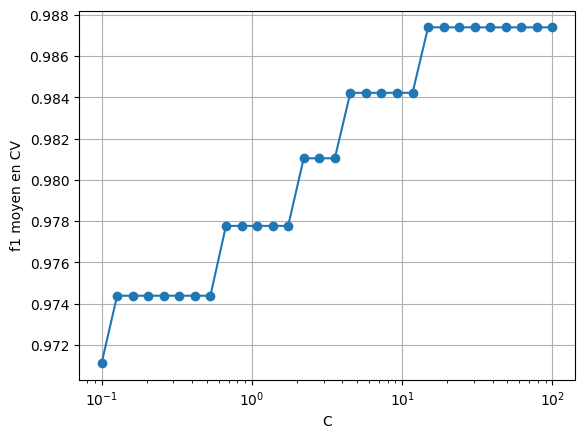

In [ ]:
mean_scores2 = reg_log2.scores_[1].mean(axis=0)
plt.plot(reg_log2.Cs_, mean_scores2, marker='o')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("f1 moyen en CV")
plt.grid(True)
plt.show()

A partir de ce graphique représentant le f1 moyen en validation croisée, on peut décider de s'arrêter sur l'optimisation de $\mathcal{C}$, en conservant $\mathcal{C}$=14.87352107, qui met à 0 45 variables (on en conserve alors 96 sur les 4200 initiales) et en ayant un f1 de ~ 0,987. On peut faire la prédiction :

In [ ]:
y_pred = reg_log2.predict(X_test)

In [ ]:
f1_reglog = f1_score(y_test, y_pred, average='binary')
print("Le f1 est :", f1_reglog)

Le f1 est : 1.0


On obtient un f1 de 1. La régression logistique est donc un excellent outil pour répondre à ce problème de classification binaire. Je trouve ce f1 parfait étrange mais comme j'ai choisi mon $\mathcal{C}$ en faisant un arbitrage avec le `f1` moyen en validation croisée, que ce `f1` n'est pas parfait sur mon jeu de données d'entraînement, il n'y a pas de raison que ce modèle fit parfaitement les données.

### 4) Les protéines les plus déterminantes

Pour répondre à cette question, il y a plusieurs méthodes possibles. On aurait pu considérer les indices de Sobol, mais on a besoin de l'indépendance des variables. Il y a également les indices de Shapley, qui sont pas évidents à mettre en oeuvre.

Dans ce projet, on a mis en oeuvre deux méthodes de classifications linéaires : un SVM et une régression logistique. On a d'ailleurs fait de la sélection de variables à la question 3, en éliminant les variables avec une variance < $10^{-6}$ et une covariance avec la variable cible < $0,20$.

On peut considérer les variables ayant les plus gros coefficients du SVM et de la régression logistique, faire une sorte "d'intersection" des 2 et conserver les 20 premières, par exemple. On peut le faire car on considère un noyau linéaire pour le SVM, les coefficients associés aux variables sont alors interprétables comme une "importance" lors de la prédiction.

Commençons avec le SVM :

In [ ]:
proteine = X[tokeep].columns

coef_svm = gs.best_estimator_.coef_[0]
importancesvm = pd.DataFrame({
    'proteine' : proteine,
    'coef_abs' : np.abs(coef_svm)
})

importancesvm = importancesvm.sort_values(by='coef_abs', ascending=False)
importancesvm.head(15)

,proteine,coef_abs
67,P31327,0.098747
80,P45954,0.076563
131,Q9H2A2,0.072906
14,P00367,0.069607
12,P00167,0.068457
117,Q7Z5P4,0.061788
1,O00748,0.055766
92,Q00266,0.055693
89,P54868,0.053314
11,O95954,0.050825


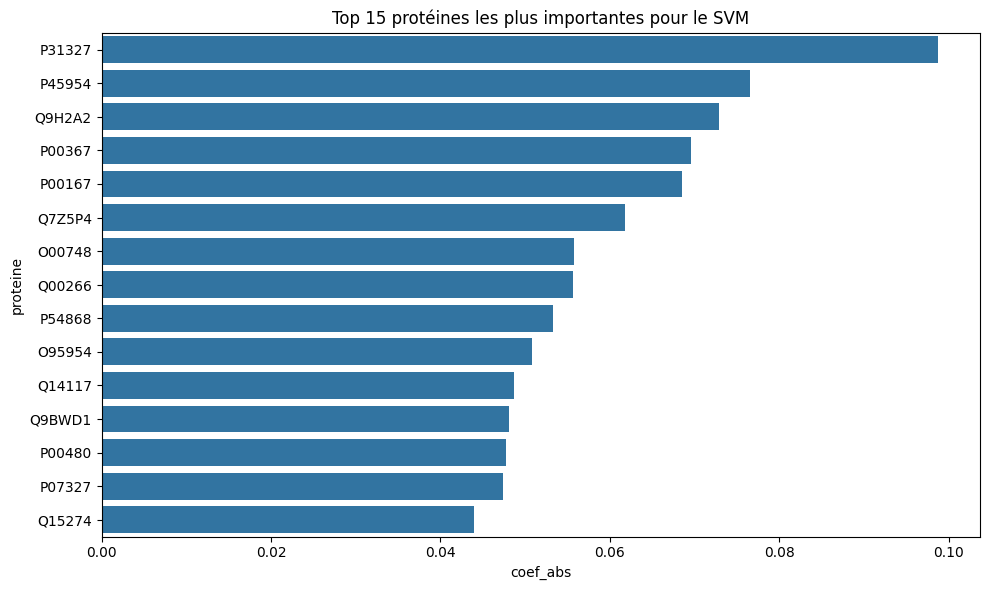

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='coef_abs', y='proteine', data=importancesvm.head(15))
plt.title("Top 15 protéines les plus importantes pour le SVM")
plt.tight_layout()
plt.show()

Maintenant, pour la régression logistique :

In [ ]:
coef_log = reg_log2.coef_[0]

importancelog = pd.DataFrame({
    'proteine': proteine,
    'coef_abs': np.abs(coef_log)
})

importancelog = importancelog.sort_values(by='coef_abs', ascending=False)
importancelog.head(15)

,proteine,coef_abs
67,P31327,1.377535
136,Q9UJM8,0.835540
14,P00367,0.523698
80,P45954,0.508797
58,P23141,0.490142
31,P07327,0.486090
89,P54868,0.453854
12,P00167,0.396248
117,Q7Z5P4,0.386593
1,O00748,0.381144


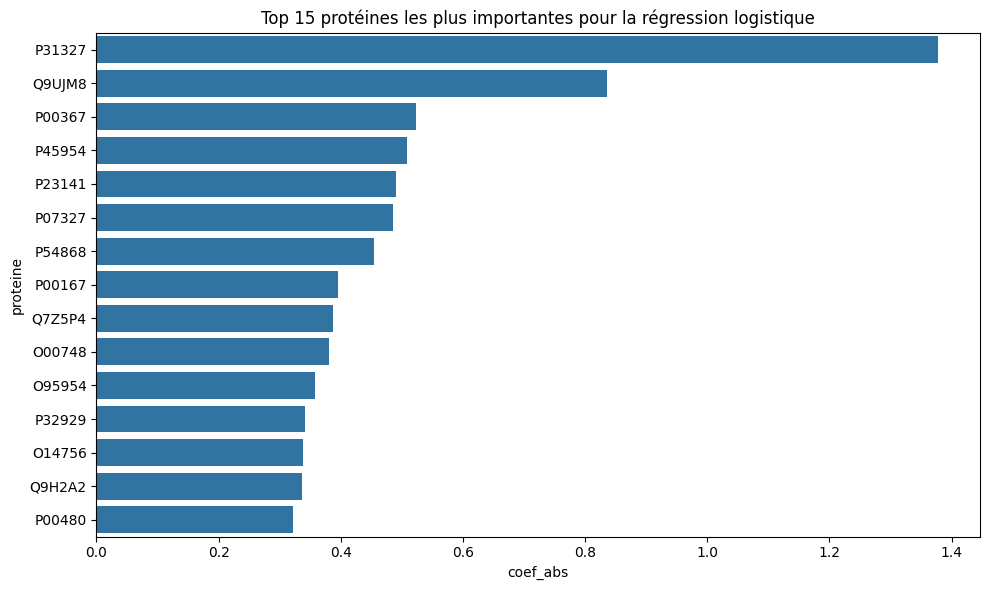

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='coef_abs', y='proteine', data=importancelog.head(15))
plt.title("Top 15 protéines les plus importantes pour la régression logistique")
plt.tight_layout()
plt.show()

Maintenant, les protéines les plus décisives sont celles qui le sont à la fois dans le SVM linéaire et dans la régression logistique. On peut alors commencer par extraire le top 50 des protéines des 2 modèles

In [ ]:
top50_svm = importancesvm.head(50)['proteine']
top50_log = importancelog.head(50)['proteine']

Et on en fait une sorte d'"intersection" pour récupérer les plus déterminantes dans les deux méthodes

In [ ]:
prot_communes = set(top50_svm) & set(top50_log) #On fait l'intersection des deux jeux de données

In [ ]:
top15_prot = list(prot_communes)[:15]

print("Les 15 premières protéines communes parmi les 50 meilleures :")
print(top15_prot)

Les 15 premières protéines communes parmi les 50 meilleures :
['P31327', 'P40261', 'Q9UJM8', 'P00367', 'Q06278', 'Q15274', 'P45954', 'P15144', 'Q6YN16', 'P09467', 'P54840', 'Q9H2A2', 'Q14749', 'Q8WW59', 'P00480']


On a ainsi identifié les 15 protéines les plus déterminantes dans la décision, la protéine la plus déterminante étant `P31327`. On ne peut cependant pas comparer les protéines issues du SVM et de la régression logistique car elles ne sont pas déterminées par les mêmes critères, les échelles de coefficients ne sont pas comparables entre modèles.